In [1]:
import pandas as pd
import numpy as np

#  Data Collection.

In [2]:
df = pd.read_csv('insuranceFraud.csv')

In [3]:
df.head(4)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y


In [4]:
df.shape

(1000, 39)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [7]:
df.drop(columns=cols_to_drop,inplace=True)

Observation: The above columns are not necessary for Prediction.

In [8]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


Observation: The above data is after Dropping the 12 columns. In the above data some variable contains "?" Which we have to change.

##  Data Preprocessing for Categorical Features

In [9]:
data=df.replace('?',np.nan)
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


Observation: I have replace those "?" with nan.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

Observation: Eleven variables are categorical in our data.

In [11]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

Observation: Three Variables have nan values. All of them are categorical.

In [12]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(data[['collision_type','property_damage','police_report_available']])
data[['collision_type','property_damage','police_report_available']] = imputer.transform(data[['collision_type','property_damage','police_report_available']])

Observation: I have use Most Frequent Category Imputation Techniques to replace nan values.

In [15]:
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [16]:
data['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [17]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

Observation: Now we can see there is no nan values all are replaced.

In [18]:
cat_df = data.select_dtypes(include='object')

In [19]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

Observation: Above are all Categorical variables.

In [20]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


Observation: From the above data I don't need four columns so I drop them.

In [21]:
cat_df.drop(columns=['insured_occupation','insured_relationship','incident_type','authorities_contacted'],axis=1)

,policy_csl,insured_sex,insured_education_level,collision_type,incident_severity,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,Side Collision,Major Damage,YES,YES,Y
1,250/500,MALE,MD,Rear Collision,Minor Damage,NO,NO,Y
2,100/300,FEMALE,PhD,Rear Collision,Minor Damage,NO,NO,N
3,250/500,FEMALE,PhD,Front Collision,Major Damage,NO,NO,Y
4,500/1000,MALE,Associate,Rear Collision,Minor Damage,NO,NO,N
...,...,...,...,...,...,...,...,...
995,500/1000,FEMALE,Masters,Front Collision,Minor Damage,YES,NO,N
996,100/300,FEMALE,PhD,Rear Collision,Major Damage,YES,NO,N
997,250/500,FEMALE,Masters,Side Collision,Minor Damage,NO,YES,N
998,500/1000,MALE,Associate,Rear Collision,Major Damage,NO,YES,N


Observation: Now I'll convert the above data into Numeric one. By Label Encoding and One Hot encoding.

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
label_enc = cat_df[['insured_sex','property_damage','police_report_available','fraud_reported']].apply(le.fit_transform)

In [25]:
label_enc.head()

,insured_sex,property_damage,police_report_available,fraud_reported
0,1,1,1,1
1,1,0,0,1
2,0,0,0,0
3,0,0,0,1
4,1,0,0,0


Observation: As we can see our 4 Variables were converted into numeric by using Label Encoding.

In [26]:
cat_df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [27]:
cat_df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [28]:
cat_df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

Observation: As we can see that the above three Variables have 3 to 4 unique values so we can use one hot encoding.

In [29]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [30]:
cat_df = cat_df.drop(['insured_sex', 'insured_education_level','insured_occupation','insured_relationship','incident_type','authorities_contacted','property_damage', 'police_report_available', 'fraud_reported'], axis=1)

Observation: The above columns is not need for one hot encoding so I drop them.

In [31]:
cat_df.columns

Index(['policy_csl', 'collision_type', 'incident_severity'], dtype='object')

In [32]:
one_hot_encoded_data = pd.get_dummies(cat_df, columns = ['policy_csl', 'collision_type','incident_severity'])

In [33]:
one_hot_encoded_data.head()

,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage
0,0,1,0,0,0,1,1,0,0,0
1,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,1,0,0,0
4,0,0,1,0,1,0,0,1,0,0


Observation: In the above data I have converted 3 Variables using one hot encoding.

In [34]:
final_cat_df = pd.concat([label_enc,one_hot_encoded_data], axis=1)

In [35]:
final_cat_df.head()

,insured_sex,property_damage,police_report_available,fraud_reported,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage
0,1,1,1,1,0,1,0,0,0,1,1,0,0,0
1,1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,1,0,0,1,0,0


Observation: The Above data is my final Categorical data.

In [36]:
numeric_data = data.select_dtypes(include = ['int64'])

In [37]:
numeric_data.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

Observation: The above features are all numeric data.

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

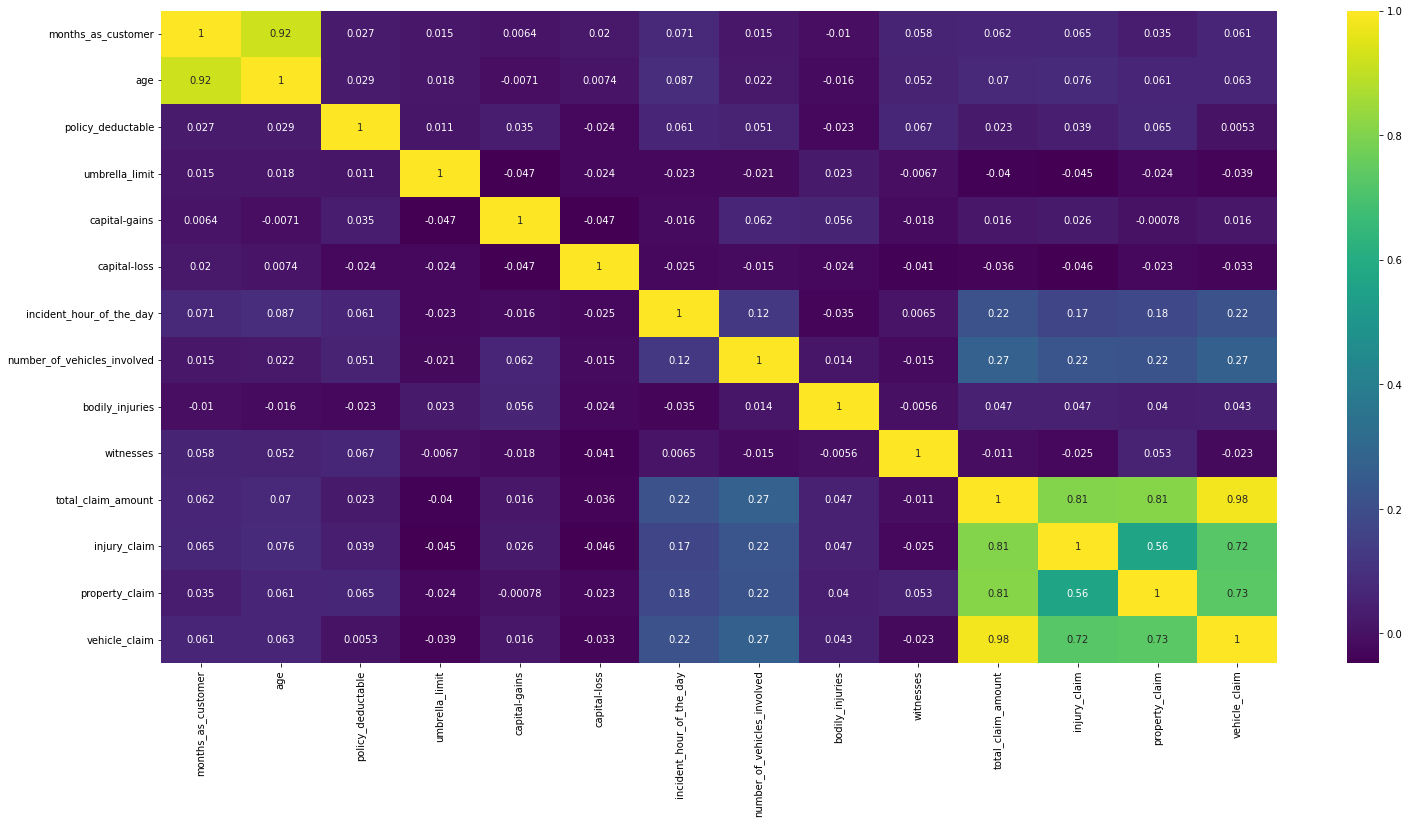

In [39]:
plt.subplots(figsize = (25,12))
sns.heatmap(numeric_data.corr(), annot = True, cmap = 'viridis')

Observation: As we can see Month as a customer and age has high correlation of 0.98 and total claim amount also have high correlation with injury,vehicle and property claim so we conclude that age and total claim column will be drop.

In [40]:
numeric_data.drop(columns = ['age','total_claim_amount'], inplace = True)

In [41]:
numeric_data.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

Observation: from the above columns Age and total claim amount features were dropped.

In [42]:
final_df = pd.concat([numeric_data,final_cat_df], axis=1)

In [43]:
final_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,1,0,0,0,1,1,0,0,0
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,1,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,1,0,0,0,1,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,1,0,1,0,0,1,0,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,0,1,0,1,0,0,1,0,0


Observation: The above data is my final dataframe.

In [44]:
final_df.shape

(1000, 26)

In [45]:
final_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim', 'insured_sex',
       'property_damage', 'police_report_available', 'fraud_reported',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'collision_type_Front Collision', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'incident_severity_Major Damage',
       'incident_severity_Minor Damage', 'incident_severity_Total Loss',
       'incident_severity_Trivial Damage'],
      dtype='object')

In [70]:
final_df['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

In [73]:
final_df.iloc[:,6:15]

,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,insured_sex,property_damage,police_report_available
0,1,1,2,6510,13020,52080,1,1,1
1,1,0,0,780,780,3510,1,0,0
2,3,2,3,7700,3850,23100,0,0,0
3,1,1,2,6340,6340,50720,0,0,0
4,1,0,1,1300,650,4550,1,0,0
...,...,...,...,...,...,...,...,...,...
995,1,0,1,17440,8720,61040,0,1,0
996,1,2,3,18080,18080,72320,0,1,0
997,3,2,3,7500,7500,52500,0,0,1
998,1,0,1,5220,5220,36540,1,0,1


As per curse of dimensionality I only have 1000 data therefore i'll only use 10 features for predicting.

In [74]:
x = final_df.iloc[:,6:15]
y = final_df['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 9)
Shape of y : (1000,)


In [75]:
x.ndim

2

In [76]:
y.ndim

1

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=0)

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

Observation: Here I've done standardization after train test split as you can see I've only standardize x only not y to avoid the data leakage.

In [79]:
from sklearn import  linear_model, metrics

In [80]:
# create logistic regression object
reg = linear_model.LogisticRegression()
   
# train the model using the training sets
reg.fit(x_train1, y_train)
  
# making predictions on the testing set
y_pred = reg.predict(x_test1)
   
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):", 
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 74.54545454545455


In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
from sklearn.metrics import classification_report

<AxesSubplot:>

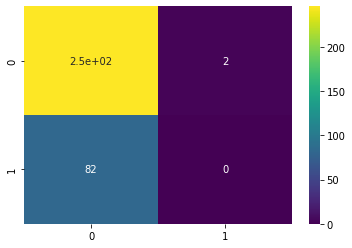

In [83]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'viridis')

In [84]:
cr = classification_report(y_test,  y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       248
           1       0.00      0.00      0.00        82

    accuracy                           0.75       330
   macro avg       0.38      0.50      0.43       330
weighted avg       0.56      0.75      0.64       330



In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train1, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(x_test1)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  73.63636363636363


In [87]:
cr = classification_report(y_test,  y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       248
           1       0.37      0.09      0.14        82

    accuracy                           0.74       330
   macro avg       0.56      0.52      0.49       330
weighted avg       0.66      0.74      0.67       330



<AxesSubplot:>

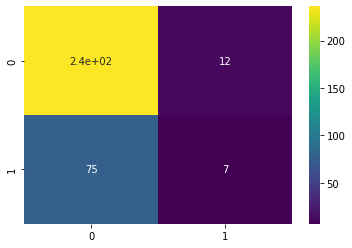

In [88]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'viridis')

In [89]:
import pickle
from joblib import dump, load

In [90]:
pickle.dump(reg,open('fraudmodel.pkl','wb'))

In [91]:
dump(sc, 'std_scaler.bin', compress=True)

['std_scaler.bin']